<a href="https://colab.research.google.com/github/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/blob/main/Module_1/Assignment_1/Assignment_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1.1
Zachariah Freitas
2022-09-06

## Import required packages

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# Import required packages
%matplotlib inline

import numpy as np
import pandas as pd
# Turn off warning messages
pd.options.mode.chained_assignment = None # default = 'warn'

import matplotlib.pylab as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Book Authors package to gain access to datasets from book.
import dmba
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

no display found. Using non-interactive Agg backend


In [16]:
# Get data
cbc_df = pd.read_csv('https://raw.githubusercontent.com/zachfreitas/ADS_505_Applied_Data_Sci_for_Business-/main/Module_1/Assignment_1/CharlesBookClub.csv')
print(cbc_df.shape)
print(cbc_df.columns)
cbc_df

(4000, 24)
Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')


,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,32950,0,141,2,2,6,0,0,0,...,0,0,0,0,0,4,1,2,0,1
3996,3997,32954,1,357,16,9,52,1,1,2,...,0,0,0,0,1,5,4,3,0,1
3997,3998,32955,0,48,12,1,12,0,0,0,...,0,0,0,0,0,2,3,1,0,1
3998,3999,32976,0,214,14,7,38,1,1,3,...,0,0,0,0,0,5,4,3,0,1


### Question 1
Partition the data into training (60%) and validation (40%). Use seed = 1.



In [17]:
trainData, testData = train_test_split(cbc_df, test_size=0.4, random_state=1)
print(trainData.shape, testData.shape)

(2400, 24) (1600, 24)


### Question 1.1
1.1. What is the response rate for the training data customers taken as a whole? What is the response rate for each of the 4 × 5 × 3 = 60 combinations of RFM categories? Which combinations have response rates in the training data that are above the overall response in the training data? (10 points)

In [18]:
# What is the response rate for the training data customers taken as a whole?
avg_rr = trainData['Florence'].mean()
avg_rr

0.08833333333333333

In [19]:
# What is the response rate for each of the 4 × 5 × 3 = 60 combinations of RFM categories?
train_RFM_avg_rr = trainData.groupby(
    by=['Mcode','Rcode','Fcode'], 
    observed=False, 
    dropna=False)['Florence'].mean().reset_index().rename(
        columns={
            "Florence": "Response_Rate",
            }
            )
train_RFM_avg_rr.head(5)

,Mcode,Rcode,Fcode,Response_Rate
0,1,1,1,0.0
1,1,2,1,0.4
2,1,3,1,0.1
3,1,4,1,0.0
4,2,1,1,0.0


In [20]:
# Which combinations have response rates in the training data that are above the overall response in the training data?
high_rr_subset = train_RFM_avg_rr.loc[train_RFM_avg_rr['Response_Rate'] > avg_rr]
high_rr_subset.sort_values(by='Response_Rate', ascending=False)

,Mcode,Rcode,Fcode,Response_Rate
5,2,1,2,0.666667
1,1,2,1,0.400000
6,2,2,1,0.333333
14,3,1,3,0.333333
17,3,2,3,0.333333
24,4,1,1,0.200000
29,4,2,3,0.200000
41,5,2,3,0.177778
36,5,1,1,0.173913
39,5,2,1,0.172414


### Question 1.2
1.2. Suppose that we decide to send promotional mail only to the “above-average” RFM 
combinations identified in part 1. Compute the response rate in the validation data using 
these combinations. (10 points)

In [21]:
# Suppose that we decide to send promotional mail only to the “above-average” RFM combinations identified in part 1. 
# Compute the response rate in the validation data using these combinations. (10 points)
test_high_rr_tbl = pd.merge(testData, high_rr_subset, how='inner', left_on= ['Mcode','Rcode','Fcode'], right_on = ['Mcode','Rcode','Fcode'])
test_high_rr_tbl['Florence'].mean()

0.08745874587458746

### Question 2
The k-NN technique can be used to create segments based on product proximity to 
similar products of the products offered as well as the propensity to purchase (as measured by the RFM variables). For The Art History of Florence, a possible 
segmentation by product proximity could be created using the following variables: 
* R: recency—months since last purchase
* F: frequency—total number of past purchases
* M: monetary—total money (in dollars) spent on books
* FirstPurch: months since first purchase
Page 7 of 7 
* RelatedPurch: total number of past purchases of related books (i.e., sum of 
purchases from the art and geography categories and of titles Secrets of Italian Cooking, Historical Atlas of Italy, and Italian Art)

In [22]:
testData.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')

In [23]:
# Prep data for KNN model
scaler = preprocessing.StandardScaler()
# Fit the scaler in trianing dataset.
scaler.fit(trainData[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']])  # Note the use of an array of column names

# Transform the full dataset
cbc_df_Norm = pd.concat([pd.DataFrame(scaler.transform(cbc_df[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']]), 
                                    columns=['R', 'F', 'M', 'FirstPurch', 'Related Purchase']),
                       cbc_df[['Florence']]], axis=1)

# Break-out the test and train datasets based on indexes
trainNorm = cbc_df_Norm.iloc[trainData.index]
display(trainNorm)
validNorm = cbc_df_Norm.iloc[testData.index]
display(validNorm)


,R,F,M,FirstPurch,Related Purchase,Florence
3999,-0.417289,-0.526337,-0.905340,-0.784969,0.112519,0
2745,2.033746,0.349270,-0.549372,0.857178,1.784631,0
492,0.808229,1.224876,1.645760,2.170895,1.784631,0
961,1.298436,-0.818206,-1.201979,-0.128110,-0.723537,0
2939,-0.662392,-0.818206,0.607522,-1.003922,-0.723537,0
...,...,...,...,...,...,...
3839,0.072918,-0.818206,-0.490044,-0.675493,-0.723537,0
1096,0.808229,0.349270,1.428225,0.638225,0.112519,0
3980,0.072918,2.392352,1.922624,2.280372,0.112519,0
235,-0.417289,-0.818206,-0.588924,-0.894445,-0.723537,0


,R,F,M,FirstPurch,Related Purchase,Florence
200,0.563125,-0.818206,-0.025309,-0.456540,-0.723537,0
1078,-0.172185,-0.818206,0.162563,-0.784969,-0.723537,0
610,-1.152599,0.933007,-0.410940,0.638225,0.112519,0
2159,-0.172185,2.100483,1.705088,0.966654,-0.723537,0
1169,-0.907496,-0.818206,-1.023996,-1.113398,-0.723537,1
...,...,...,...,...,...,...
556,1.788643,-0.526337,0.558082,0.200319,0.948575,0
1265,0.072918,-0.526337,-1.221755,-0.566016,-0.723537,0
3688,0.072918,-0.526337,-1.211867,-0.347063,0.112519,0
3993,-0.907496,-0.818206,-0.677916,-1.113398,-0.723537,0


### Question 2.1
Use the k-NN approach with uniform weights to classify cases with k = 1, 2, …, 11, using Florence as the outcome variable. Based on the validation set, find the best k. Remember to normalize all five variables. Create a lift curve for the best k model, and report the expected lift for an equal number of customers from the validation dataset. (12 points) \
Hint: You can check [sklearn.neighbors.KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to assign different weights function. 


In [24]:
train_X = trainNorm.drop('Florence', axis=1)
train_y = trainNorm['Florence']
valid_X = validNorm.drop('Florence', axis=1)
valid_y = validNorm['Florence']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(train_X, train_y)
    # Save Validation Results:
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame and show
results = pd.DataFrame(results)
print('accuracy by k')
display(results)

accuracy by k


,k,accuracy
0,1,0.845625
1,2,0.912500
2,3,0.895000
3,4,0.917500
4,5,0.913750
5,6,0.919375
6,7,0.916875
7,8,0.918750
8,9,0.916875
9,10,0.920000


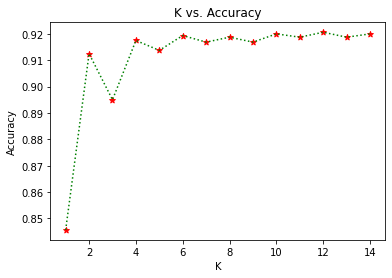

In [27]:
%matplotlib inline
# show accuracy by k
plt.plot(results.k, results.accuracy, linestyle=':', c='green')
plt.title('K vs. Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')

noteworthy_points = results[results['accuracy'] >= .8]
plt.scatter(noteworthy_points.k, noteworthy_points.accuracy, c='red', marker='*')

plt.show()

In [28]:
# Use best K to fit model and review performance.
k = 6
knn = KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(train_X, train_y)
preds = knn.predict(valid_X)
preds_prob = knn.predict_proba(valid_X)

In [29]:
full_result = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in preds_prob],
                            'p(1)': [p[1] for p in preds_prob],
                            'predicted': knn.predict(valid_X)})

full_result = full_result.sort_values(by=['p(1)'], ascending=False)

In [30]:
full_result.head(5)

,actual,p(0),p(1),predicted
613,1,0.166667,0.833333,1
1610,0,0.166667,0.833333,1
988,0,0.333333,0.666667,1
305,0,0.333333,0.666667,1
2379,0,0.333333,0.666667,1


In [31]:
# confusion matrix
classificationSummary(full_result.actual, full_result.predicted)

Confusion Matrix (Accuracy 0.9194)

       Prediction
Actual    0    1
     0 1470    4
     1  125    1


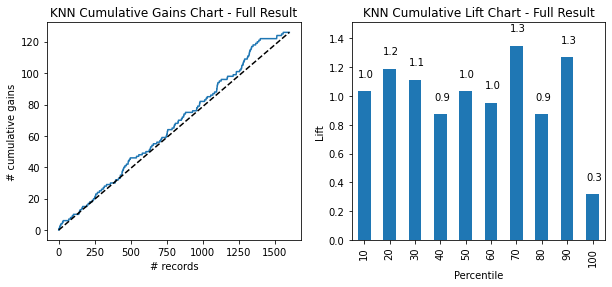

In [39]:
# Gains and Lift Chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result.actual, ax=axes[0])
liftChart(full_result.actual, title=False, ax=axes[1])
axes[0].set_title('KNN Cumulative Gains Chart - Full Result')
axes[1].set_title('KNN Cumulative Lift Chart - Full Result')

plt.show()

### Question 2.2
The k-NN prediction algorithm gives a numerical value, which is a weighted 
average of the values of the Florence variable for the k-NN with weights that are inversely proportional to distance. Using the best k that you calculated above with k-NN classification, now run a model with k-NN prediction and compute a lift curve for the validation data. Use all 5 predictors and normalized data. What is the range within which a prediction will fall? How does this result compare to the output you get with the k-NN classification? (10 points) \
Hint: You can check [sklearn.neighbors.KneighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to assign different weights 
function. 

In [41]:
# Use best K to fit model and review performance.
k = 6
knn_dist = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(train_X, train_y)
preds = knn_dist.predict(valid_X)
preds_prob = knn_dist.predict_proba(valid_X)

In [42]:
full_result_dist = pd.DataFrame({'actual': valid_y, 
                            'p(0)': [p[0] for p in preds_prob],
                            'p(1)': [p[1] for p in preds_prob],
                            'predicted': knn_dist.predict(valid_X)})

full_result_dist = full_result_dist.sort_values(by=['p(1)'], ascending=False)

In [43]:
# confusion matrix
classificationSummary(full_result_dist.actual, full_result_dist.predicted)

Confusion Matrix (Accuracy 0.8975)

       Prediction
Actual    0    1
     0 1432   42
     1  122    4


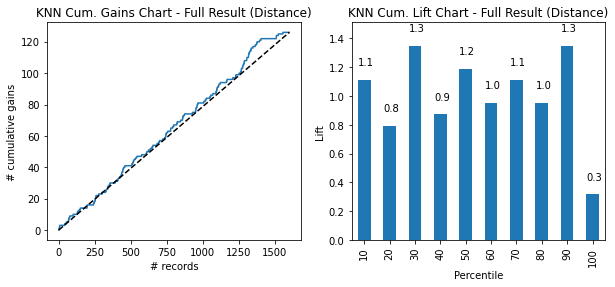

In [46]:
# Gains and Lift Chart
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(full_result_dist.actual, ax=axes[0])
liftChart(full_result_dist.actual, title=False, ax=axes[1])
axes[0].set_title('KNN Cum. Gains Chart - Full Result (Distance)')
axes[1].set_title('KNN Cum. Lift Chart - Full Result (Distance)')

plt.show()

### Question 3
 The logistic regression model offers a powerful method for modeling response because it yields well-defined purchase probabilities. The model is especially attractive in consumer-choice settings because it can be derived from the random utility theory of consumer behavior. \
Use the training set data of 2400 records to construct two logistic regression models with Florence as the outcome variable and each of the following sets of predictors: (10 points) \
* The full set of 16 predictors in the dataset
* A subset of predictors that you judge to be the best

In [47]:
cbc_df.columns

Index(['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks',
       'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks',
       'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence', 'Related Purchase',
       'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence'],
      dtype='object')

In [48]:
# Model: The full set of 16 predictors in the dataset

# Transform the full dataset
full_16_logit = cbc_df[['Gender', 'M', 'R', 'F', 'FirstPurch', 'ChildBks', 'YouthBks', 'CookBks', 
                        'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt',
                        'Related Purchase', 'Florence']]

# Break-out the test and train datasets based on indexes
train_full_16 = full_16_logit.iloc[trainData.index]
valid_full_16 = full_16_logit.iloc[testData.index]



train_16_X = train_full_16.drop('Florence', axis=1)
train_16_y = train_full_16['Florence']
valid_16_X = valid_full_16.drop('Florence', axis=1)
valid_16_y = valid_full_16['Florence']


# Logistic Regression.
logit_full = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_full.fit(train_16_X, train_16_y)


# Print the intercept
print('intercept ', logit_full.intercept_[0], '\n')

# could use display() to present this cleaner, but for illustration, leaving as-is
# Print the coefficients.
display(pd.DataFrame({'coeff': logit_full.coef_[0]}, index=train_16_X.columns).transpose())

# Print the AIC of our model.
print('\nAIC', AIC_score(valid_16_y, logit_full.predict(valid_16_X), df=len(train_16_X.columns) + 1))

# confusion matrix
classificationSummary(valid_16_y, logit_full.predict(valid_16_X))

intercept  -2.1236895803222366 



,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Related Purchase
coeff,-0.377008,-0.00204,-0.023132,0.215232,0.006739,-0.228385,-0.195594,-0.409458,-0.231356,-0.316627,0.284834,0.110611,-0.178842,-0.084097,0.066304,0.19881



AIC 458.62272466356626
Confusion Matrix (Accuracy 0.9237)

       Prediction
Actual    0    1
     0 1474    0
     1  122    4


In [49]:
# Model: A subset of predictors that you judge to be the best

logit_red = LogisticRegressionCV(penalty="l1", solver='liblinear', cv=5)
logit_red.fit(train_16_X, train_16_y)

print('regularization', logit_red.C_, '\n')
print('intercept ', logit_red.intercept_[0], '\n')

display(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=train_16_X.columns).transpose())

print('\nAIC', AIC_score(valid_16_y, logit_red.predict(valid_16_X), df=len(train_16_X.columns) + 1), '\n')

# confusion matrix
classificationSummary(valid_16_y, logit_red.predict(valid_16_X))

regularization [2.7825594] 

intercept  -2.106200385268373 



,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Related Purchase
coeff,-0.370373,-0.002054,-0.024176,0.207521,0.006877,-0.218358,-0.179077,-0.402075,-0.220355,-0.301456,0.355082,0.182655,-0.086298,0.0,0.104841,0.126205



AIC 458.62272466356626 

Confusion Matrix (Accuracy 0.9237)

       Prediction
Actual    0    1
     0 1474    0
     1  122    4


In [50]:
# Model: RFM Only

train_RFM_X = train_full_16[['R','F','M']]
valid_RFM_X = valid_full_16[['R','F','M']]

logit_rfm = LogisticRegressionCV(penalty="l2", solver='liblinear')
logit_rfm.fit(train_RFM_X, train_16_y)

print('regularization', logit_rfm.C_, '\n')
print('intercept ', logit_rfm.intercept_[0], '\n')

display(pd.DataFrame({'coeff': logit_rfm.coef_[0]}, index=train_RFM_X.columns).transpose())

print('\nAIC', AIC_score(valid_16_y, logit_rfm.predict(valid_RFM_X), df=len(train_RFM_X.columns) + 1), '\n')

# confusion matrix
classificationSummary(valid_16_y, logit_rfm.predict(valid_RFM_X))

regularization [0.0001] 

intercept  -0.008066376301044698 



,R,F,M
coeff,-0.061379,0.011181,-0.006971



AIC 484.24010421272123 

Confusion Matrix (Accuracy 0.9213)

       Prediction
Actual    0    1
     0 1474    0
     1  126    0


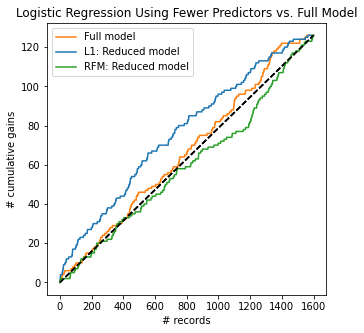

In [52]:
# Create datasets for Gains Chart
logit_rfm_proba = logit_rfm.predict_proba(valid_RFM_X)
rfm_result = pd.DataFrame({'actual': valid_16_y, 
                            'p(0)': [p[0] for p in logit_rfm_proba],
                            'p(1)': [p[1] for p in logit_rfm_proba],
                            'predicted': logit_rfm.predict(valid_RFM_X),
                          })
rfm_result = rfm_result.sort_values(by=['p(1)'], ascending=False)


logit_red_proba = logit_red.predict_proba(valid_16_X)
red_result = pd.DataFrame({'actual': valid_16_y, 
                            'p(0)': [p[0] for p in logit_red_proba],
                            'p(1)': [p[1] for p in logit_red_proba],
                            'predicted': logit_red.predict(valid_16_X),
                          })
red_result = red_result.sort_values(by=['p(1)'], ascending=False)

# Plot Gains Charts
ax = gainsChart(full_result.actual, label='Full model', color='C1', figsize=[5, 5])
ax = gainsChart(red_result.actual, label='L1: Reduced model', color='C0', ax=ax)
ax = gainsChart(rfm_result.actual, label='RFM: Reduced model', color='C2', ax=ax)
ax.legend()
ax.set_title('Logistic Regression Using Fewer Predictors vs. Full Model')

plt.show()

### Question 3.1
If the cutoff criterion for a campaign is a 30% likelihood of a purchase, find the customers in the validation data that would be targeted and count the number of buyers in this set. (10 points)

In [53]:
# Subset of reduction model using a 30% cutoff
cut_30 = red_result[red_result['p(1)']>0.30]

# confusion matrix
classificationSummary(cut_30.actual, cut_30.predicted)
print('\n')
print('Number of customers targeted:', cut_30.shape[0])
print('Predicted Purchases:', cut_30['predicted'].sum())
print('Actual Purchases:', cut_30['actual'].sum())
print('Pct Predicted:', cut_30['predicted'].sum()/cut_30.shape[0])

Confusion Matrix (Accuracy 0.8235)

       Prediction
Actual  0  1
     0 24  0
     1  6  4


Number of customers targeted: 34
Predicted Purchases: 4
Actual Purchases: 10
Pct Predicted: 0.11764705882352941


In [54]:
# Reduction confusion matrix for comparison
classificationSummary(red_result.actual, red_result.predicted)
print('\n')
print('Number of customers targeted:', red_result.shape[0])
print('Predicted Purchases:', red_result['predicted'].sum())
print('Actual Purchases:', red_result['actual'].sum())
print('Pct Predicted:', red_result['predicted'].sum()/red_result.shape[0])

Confusion Matrix (Accuracy 0.9237)

       Prediction
Actual    0    1
     0 1474    0
     1  122    4


Number of customers targeted: 1600
Predicted Purchases: 4
Actual Purchases: 126
Pct Predicted: 0.0025


In [55]:
# Subset of Full model using a 30% cutoff
cut_30 = full_result[full_result['p(1)']>0.30]

# confusion matrix
classificationSummary(cut_30.actual, cut_30.predicted)
print('\n')
print('Number of customers targeted:', cut_30.shape[0])
print('Predicted Purchases:', cut_30['predicted'].sum())
print('Actual Purchases:', cut_30['actual'].sum())
print('Pct Predicted:', cut_30['predicted'].sum()/cut_30.shape[0])

Confusion Matrix (Accuracy 0.9072)

       Prediction
Actual   0   1
     0 175   4
     1  14   1


Number of customers targeted: 194
Predicted Purchases: 5
Actual Purchases: 15
Pct Predicted: 0.02577319587628866


### Question 3.2
Briefly explain, in two to three paragraphs, the business objective, the data mining models used, why they were used, the model results, and your recommendations to your non-technical stakeholder team. (18 points)

#### Answer:
The main business objective of this project was to find a model that helps our organization target our marketing only to prospects that are highly likely to purchase a particular book about Florence. For this project we tried two algorithms. The first was KNN classification algorithm, and the second was a propensity model using logistic regression. 


KNN was used because we hypothesized that similar customers, would behave, similarly. We found this model not to perform as well as our other models. It predicted more miss purchase predictions than our other models. For our logistic regression models, we tried both L2 and L1 regularization models. We performed L1 regularization because we didn’t want overfit our model because we assumed that all of our variables were important. Regularization helps us prevent overfitting. 


Our recommendations for our stakeholders are as follows:
* Use the L1 Logistic Regression model because it showed the highest lift, when the cutoff was set a 0.3, relative to all of our other models.
* Consider looking for an optimal cutoff where the marketing costs are minimized, and the profitability is maximized. Using 0.3 seems arbitrary at this point.
